## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [0]:
# Larger CNN for the MNIST Dataset
import numpy
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [19]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.3903 - acc: 0.8805 - val_loss: 0.0893 - val_acc: 0.9716
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0991 - acc: 0.9698 - val_loss: 0.0552 - val_acc: 0.9827
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0737 - acc: 0.9771 - val_loss: 0.0417 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0603 - acc: 0.9816 - val_loss: 0.0368 - val_acc: 0.9876
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0521 - acc: 0.9835 - val_loss: 0.0356 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0445 - acc: 0.9859 - val_loss: 0.0287 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0390 - acc: 0.9875 - val_loss: 0.0298 - val_acc

In [20]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.86%


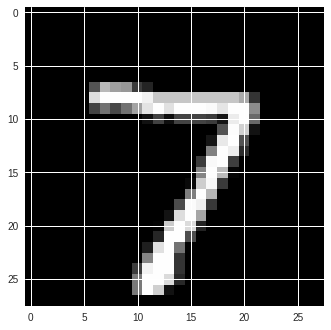

Model prediction: [9.2011634e-09 6.1387290e-08 1.9502431e-06 6.3489970e-06 3.3738388e-09
 2.7438233e-08 5.4045827e-11 9.9999130e-01 1.9826597e-08 3.3423805e-07]


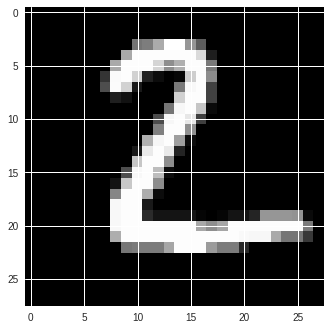

Model prediction: [1.38564656e-05 1.52538109e-04 9.99832511e-01 8.90526941e-09
 1.54688995e-09 3.53254544e-11 5.03006731e-07 1.13748815e-08
 6.33954528e-07 5.82216150e-11]


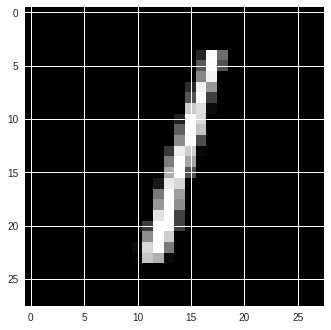

Model prediction: [1.0038951e-06 9.9993479e-01 2.1417908e-07 4.0503467e-09 4.7084610e-05
 3.5452179e-06 6.4489400e-06 1.0343458e-06 3.7367447e-06 2.1345102e-06]


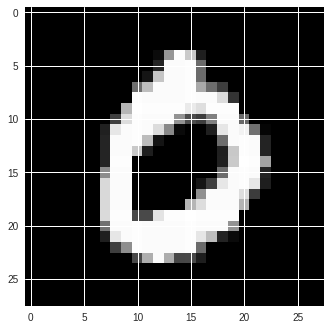

Model prediction: [9.9965775e-01 7.1283184e-09 9.1214503e-07 5.2358951e-07 3.3471372e-07
 8.0722339e-06 3.1294004e-04 7.3369733e-08 3.4412176e-06 1.6020978e-05]


In [21]:
# Predict single images
n_images = 4
# Get images from test set
test_images = X_test[:n_images]
# Predicts
# Use the model to predict the images class
preds = list(model.predict(test_images))
# print("Large CNN Error: %.2f%%" % (100-scores[1]*100))
# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])